# ScRNA-Seq of human PBMC

In [1]:
# Import packages
import scanpy as sc
import pandas as pd
from functions import data_preprocessing as dp
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Read AnnData and add metadata information

In [2]:
file_paths = '../../../../data/processed/immune_cells/merged/'

filenames = ['Freytag_merged.h5ad', 'Sun_merged.h5ad', '10X_merged.h5ad']

adata = []
for k, name in enumerate(filenames):
    file = file_paths + name
    adata_temp = sc.read(file, cache=True)
    adata.append(adata_temp) 


In [3]:
adata = adata[0].concatenate(adata[1:], batch_key='sample_ID', index_unique=None)

adata.obs.index.rename('barcode', inplace=True)
# Assign adata.X to be the preprocessed unnormalized data
adata.X = adata.layers['pp_counts']

adata

AnnData object with n_obs × n_vars = 22027 × 8586
    obs: 'n_counts', 'log_n_counts', 'n_genes', 'log_n_genes', 'pct_counts_in_top_20_genes', 'mt_frac', 'ribo_frac', 'hem_frac', 'outlier', 'size_factors', 'cell_type', 'patientID', 'study', 'chemistry', 'tissue', 'species', 'data_type', 'sample_ID'
    var: 'gene_ids-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'gene_id-1', 'n_cells-Sun_1-1', 'highly_variable-Sun_1-1', 'means-Sun_1-1', 'dispersions-Sun_1-1', 'dispersions_norm-Sun_1-1', 'n_cells-Sun_2-1', 'highly_variable-Sun_2-1', 'means-Sun_2-1', 'dispersions-Sun_2-1', 'dispersions_norm-Sun_2-1', 'n_cells-Sun_3-1', 'highly_variable-Sun_3-1', 'means-Sun_3-1', 'dispersions-Sun_3-1', 'dispersions_norm-Sun_3-1', 'n_cells-Sun_4-1', 'highly_variable-Sun_4-1', 'means-Sun_4-1', 'dispersions-Sun_4-1', 'dispersions_norm-Sun_4-1', 'gene_ids-2', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'feature_types-2'
    laye

In [4]:
adata.obs.head(5)

,n_counts,log_n_counts,n_genes,log_n_genes,pct_counts_in_top_20_genes,mt_frac,ribo_frac,hem_frac,outlier,size_factors,cell_type,patientID,study,chemistry,tissue,species,data_type,sample_ID
barcode,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTGTCC-1-Freytag,5711.0,8.650325,1535,7.336937,0.271406,0.051305,0.467694,0.000175,False,1.553348,Naive CD4+ T cells,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,0
AAACCTGAGTACACCT-1-Freytag,2755.0,7.921535,1003,6.911747,0.301996,0.022868,0.380036,0.000000,False,0.749883,Effector CD4+ T cells,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,0
AAACCTGAGTGTACGG-1-Freytag,2705.0,7.903227,1040,6.947937,0.279482,0.048059,0.310536,0.000000,False,0.735120,CD8+ NKT-like cells,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,0
AAACCTGCATCACAAC-1-Freytag,4474.0,8.406261,1308,7.177019,0.283862,0.027939,0.463567,0.000224,False,1.218184,Effector CD4+ T cells,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,0
AAACCTGGTAAATGAC-1-Freytag,4372.0,8.383204,1433,7.268223,0.263724,0.026304,0.422232,0.000686,False,1.186745,Effector CD4+ T cells,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,0


## Visualize

In [5]:
# Normalize
adata = dp.log1p_normalize(adata)

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


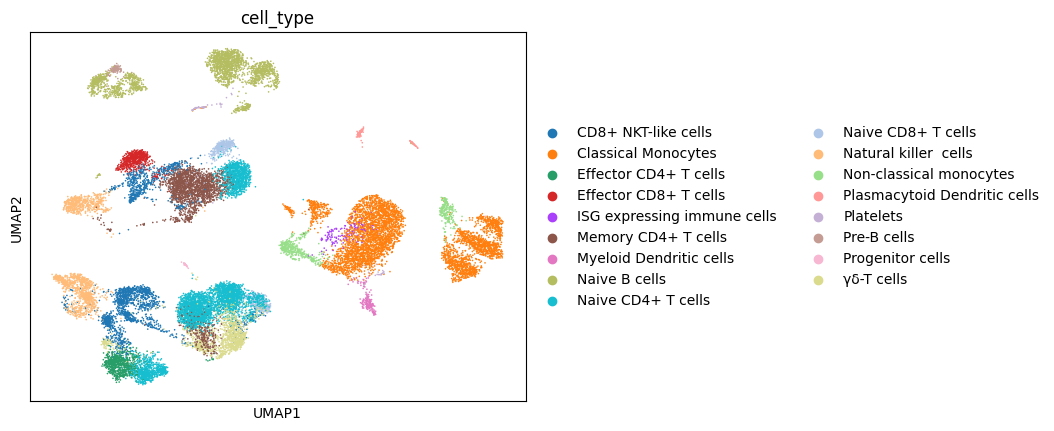

In [6]:
from sklearn.preprocessing import StandardScaler
vis_adata = adata.copy()
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

# Scale data using dp.scale_data() to subtract data by the mean of each feature and divide by the std of that feature.
# This was done as a preprocessing step for annotating cell types in ScType in R and will therefore be used for visualization purpose. 
# https://github.com/satijalab/seurat/issues/1166  
vis_adata.X = dp.scale_data(vis_adata.X)

sc.pp.pca(vis_adata, n_comps=40, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(vis_adata)
sc.pl.umap(vis_adata, color='cell_type')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


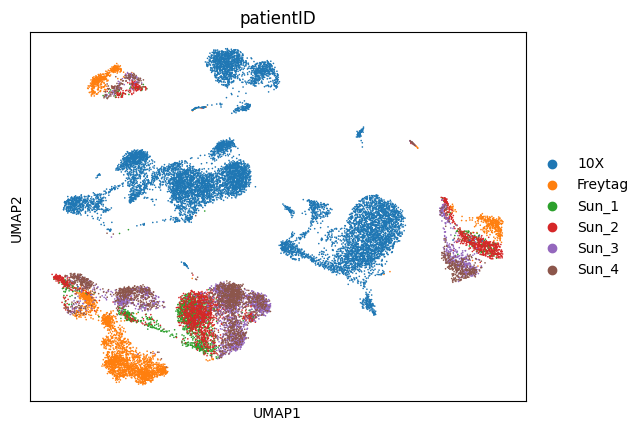

In [7]:
sc.pl.umap(vis_adata, color='patientID')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


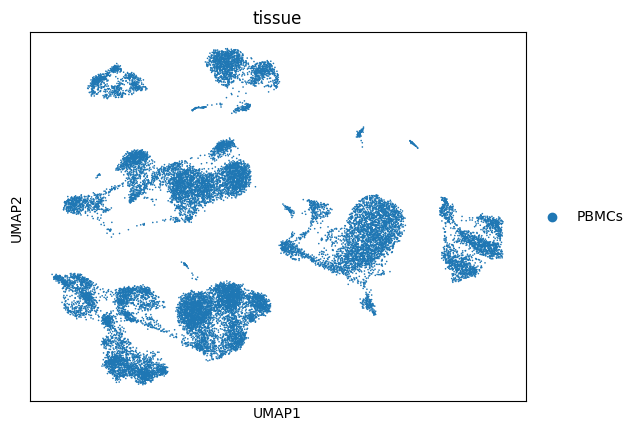

In [8]:
sc.pl.umap(vis_adata, color='tissue')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


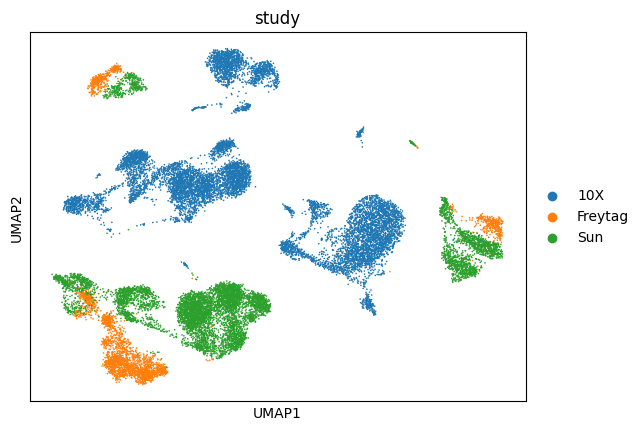

In [9]:
sc.pl.umap(vis_adata, color='study')

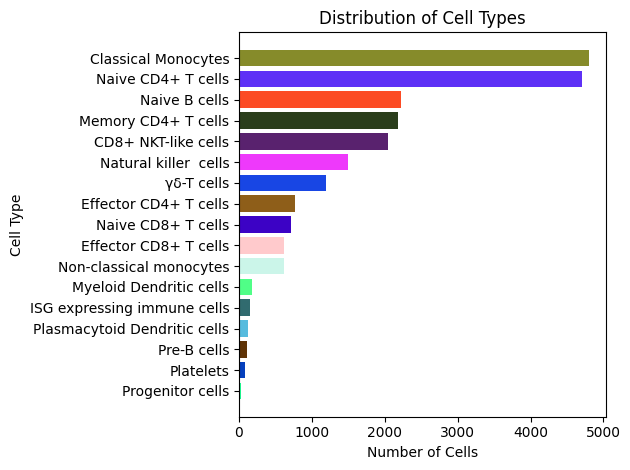

In [10]:
import matplotlib.pyplot as plt
import random

# Visualize distribution of cell types
cell_types = adata.obs["cell_type"]

cell_type_counts = {}
for string in cell_types:
    if string in cell_type_counts:
        cell_type_counts[string] += 1
    else:
        cell_type_counts[string] = 1

sorted_data = sorted(cell_type_counts.items(), key=lambda x: x[1], reverse=False)
unique_strings, counts = zip(*sorted_data)

bar_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in unique_strings]

plt.barh(unique_strings, counts, color=bar_colors)

plt.xlabel('Number of Cells')
plt.ylabel('Cell Type')
plt.title('Distribution of Cell Types')

plt.tight_layout()
plt.show()

## Download processed data, including labels

In [11]:
adata.write("../../../../data/processed/immune_cells/merged/PBMC_merged_all.h5ad")